In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO


# 1.1
# 1
X = pd.read_csv("data/sy02-p2016.csv")

In [2]:
X.shape
X.info

<bound method DataFrame.info of         nom specialite  niveau statut dernier diplome obtenu  note median  \
0      Etu1         GI       4    UTC                    BAC          6.5   
1      Etu2         GB       2    UTC                    DUT          6.5   
2      Etu3        GSU       4    UTC                    BAC         14.0   
3      Etu4        GSM       2    UTC                    BAC         13.0   
4      Etu5         GI       4    UTC                    DUT          7.5   
..      ...        ...     ...    ...                    ...          ...   
291  Etu292         GB       2    UTC                    BTS          8.5   
292  Etu293         GB       2    UTC                    BAC         13.5   
293  Etu294        GSU       2    UTC                    BAC         12.0   
294  Etu295        GSU       2    UTC                    DUT         12.0   
295  Etu296        GSU       4    UTC                    BAC          9.5   

    correcteur median  note final correcteu

In [3]:
X2 = pd.read_csv("data/sy02-p2016-2.csv", sep='&')
X3 = pd.read_csv("data/sy02-p2016-3.csv", sep='\t')
X4 = pd.read_csv("data/sy02-p2016-4.csv", sep=';')
X5 = pd.read_csv("data/sy02-p2016-5.csv", sep=' ', index_col=0)
print(X.shape, X2.shape, X3.shape, X4.shape, X5.shape)

(296, 11) (296, 11) (296, 11) (296, 11) (296, 11)


In [4]:
# 1.2
df = pd.read_csv(StringIO("0\n1.4"), header=None)

print(pd.read_csv(StringIO("0\n1"), header=None).dtypes)
print(pd.read_csv(StringIO("0\n1.3"), header=None).dtypes)
print(pd.read_csv(StringIO("T\nF"), header=None).dtypes)
print(pd.read_csv(StringIO("True\nFalse"), header=None).dtypes)

0    int64
dtype: object
0    float64
dtype: object
0    object
dtype: object
0    bool
dtype: object


In [5]:
# 4
X.specialite = pd.Categorical(X.specialite)
X.statut = pd.Categorical(X.statut)
X["dernier diplome obtenu"] = pd.Categorical(X["dernier diplome obtenu"])


# X["correcteur median"] = pd.Categorical(X["correcteur median"])
# X["correcteur final"] = pd.Categorical(X["correcteur final"])
# 不懂上面和下面这两种方式有什么区别
correcteur_type = pd.CategoricalDtype(pd.concat([X["correcteur final"], X["correcteur median"]]).dropna().unique())
X["correcteur median"] = X["correcteur median"].astype(correcteur_type)
X["correcteur final"] = X["correcteur final"].astype(correcteur_type)

X.resultat = pd.Categorical(X.resultat, categories=["ABS", "F", "Fx", "E", "D", "C", "B", "A"], ordered=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   nom                     296 non-null    object  
 1   specialite              296 non-null    category
 2   niveau                  296 non-null    int64   
 3   statut                  296 non-null    category
 4   dernier diplome obtenu  290 non-null    category
 5   note median             293 non-null    float64 
 6   correcteur median       293 non-null    category
 7   note final              284 non-null    float64 
 8   correcteur final        284 non-null    category
 9   note totale             284 non-null    float64 
 10  resultat                296 non-null    category
dtypes: category(6), float64(3), int64(1), object(1)
memory usage: 15.4+ KB


In [6]:
# 1.3
# 5
X = pd.read_csv("data/effectifs.csv")

X = X.assign(Semestre=X.Semestre.str[8:])
# X.Semestre = X.Semestre.str[8:]  # 感觉这种方式也可以
print(X.head())

  Semestre  SY02  SY09  SY19
0    P2019   220  75.0   NaN
1    A2019   180   NaN  82.0
2    A2018   200   NaN  78.0
3    P2018   210  76.0   NaN
4    A2017   189   NaN  69.0


In [7]:
# 6
X = X.assign(Saison=X.Semestre.str[0])
X = X.assign(Annee=X.Semestre.str[1:])
X.drop(columns="Semestre", inplace=True)  # 注意不要先drop了
X.head()

,SY02,SY09,SY19,Saison,Annee
0,220,75.0,NaN,P,2019
1,180,NaN,82.0,A,2019
2,200,NaN,78.0,A,2018
3,210,76.0,NaN,P,2018
4,189,NaN,69.0,A,2017


In [8]:
X = X.melt(id_vars=["Saison", "Annee"], value_name="effectif", var_name="UV")
X = X.loc[~pd.isna(X.effectif)]  # 用于选择非空数据行
X = X.assign(effectif=X.effectif.astype(int))
X

,Saison,Annee,UV,effectif
0,P,2019,SY02,220
1,A,2019,SY02,180
2,A,2018,SY02,200
3,P,2018,SY02,210
4,A,2017,SY02,189
5,P,2017,SY02,230
6,A,2016,SY02,213
7,P,2016,SY02,242
8,P,2019,SY09,75
11,P,2018,SY09,76


In [41]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris = iris.melt(id_vars="species")
iris

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


In [44]:
# iris = iris.assign(type=iris.variable.str[:5], dim=iris.variable.str[6:])
# 或者
iris = iris.assign(type=iris.variable.str.split('_', expand=True)[0], dim=iris.variable.str.split('_', expand=True)[1])
iris = iris.drop(columns=["variable"])
iris

,species,value,type,dim
0,setosa,5.1,sepal,length
1,setosa,4.9,sepal,length
2,setosa,4.7,sepal,length
3,setosa,4.6,sepal,length
4,setosa,5.0,sepal,length
...,...,...,...,...
595,virginica,2.3,petal,width
596,virginica,1.9,petal,width
597,virginica,2.0,petal,width
598,virginica,2.3,petal,width


In [84]:
babies = pd.read_csv("data/babies23.data", sep="\s+")
babies = babies[["wt", "gestation", "parity", "age", "ht", "wt.1", "smoke", "ed"]]
babies.columns = ["bwt", "gestation", "parity", "age", "height", "weight", "smoke", "education"]
babies

,bwt,gestation,parity,age,height,weight,smoke,education
0,120,284,1,27,62,100,0,5
1,113,282,2,33,64,135,0,5
2,128,279,1,28,64,115,1,2
3,123,999,2,36,69,190,3,5
4,108,282,1,23,67,125,1,5
...,...,...,...,...,...,...,...,...
1231,113,275,0,27,60,100,0,5
1232,128,265,1,24,67,120,0,5
1233,130,291,4,30,65,150,1,2
1234,125,281,0,21,65,110,0,4


(array([  1.,   1.,   1.,   6.,  47., 206., 754., 177.,  26.,   4.]),
 array([148. , 168.5, 189. , 209.5, 230. , 250.5, 271. , 291.5, 312. ,
        332.5, 353. ]),
 <BarContainer object of 10 artists>)

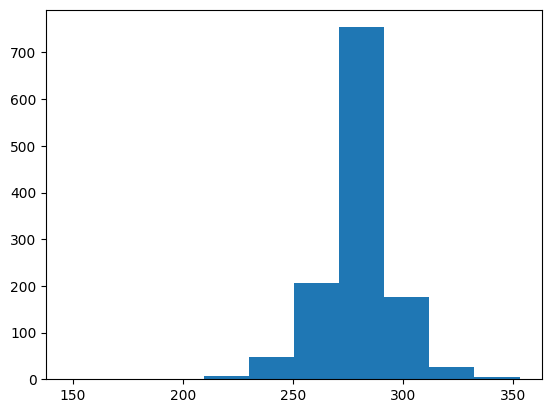

In [72]:
import matplotlib.pyplot as plt

plt.hist(babies.gestation)


In [85]:
import numpy as np

babies.loc[babies.bwt == 999, "bwt"] = np.nan
babies.loc[babies.gestation == 999, "gestation"] = np.nan
babies.loc[babies.age == 99, "age"] = np.nan
babies.loc[babies.height == 99, "height"] = np.nan
babies.loc[babies.weight == 999, "weight"] = np.nan
babies.loc[babies.smoke == 9, "smoke"] = np.nan
babies.loc[babies.education == 9, "education"] = np.nan
babies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bwt        1236 non-null   float64
 1   gestation  1223 non-null   float64
 2   parity     1236 non-null   int64  
 3   age        1234 non-null   float64
 4   height     1214 non-null   float64
 5   weight     1200 non-null   float64
 6   smoke      1226 non-null   float64
 7   education  1235 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 77.4 KB


In [86]:
mask = babies.smoke == 1
babies.loc[babies.smoke == 1,"smoke"] = "Smoking"
# babies.loc[~(babies.smoke == 1),"smoke"] = "NonSmoking"  # 这就是为什么用mask做变量，在上一步中已经把1全部换位Smoking了，所以这里~(babies.smoke == 1)会全选
babies.loc[~mask== 1,"smoke"] = "Smoking"
babies

,bwt,gestation,parity,age,height,weight,smoke,education
0,120.0,284.0,1,27.0,62.0,100.0,Smoking,5.0
1,113.0,282.0,2,33.0,64.0,135.0,Smoking,5.0
2,128.0,279.0,1,28.0,64.0,115.0,Smoking,2.0
3,123.0,NaN,2,36.0,69.0,190.0,Smoking,5.0
4,108.0,282.0,1,23.0,67.0,125.0,Smoking,5.0
...,...,...,...,...,...,...,...,...
1231,113.0,275.0,0,27.0,60.0,100.0,Smoking,5.0
1232,128.0,265.0,1,24.0,67.0,120.0,Smoking,5.0
1233,130.0,291.0,4,30.0,65.0,150.0,Smoking,2.0
1234,125.0,281.0,0,21.0,65.0,110.0,Smoking,4.0


In [87]:
def Sijk(d, i, j, k):
    return (
            2 * d[i, j] ** 2 * d[i, k] ** 2
            + 2 * d[i, j] ** 2 * d[j, k] ** 2
            + 2 * d[i, k] ** 2 * d[j, k] ** 2
            - d[i, j] ** 4
            - d[i, k] ** 4
            - d[j, k] ** 4
    )


def S_min(d):
    N = d.shape[0]
    return min(
        Sijk(d, i, j, k)
        for i in range(N)
        for j in range(N) if j > i
        for k in range(N) if k > j
)

range(0, 5)